In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.special
import math as mt
from scipy.interpolate import interp1d

In [2]:
interv = 6
n= 1000
class Funcoes:
#    def __init__(self,n):
#        self.n = n

    def uniform (y):
        x = np.linspace(-interv, interv, num=n)
        y = np.linspace(y,y, num=n)
        return (x,y)
    
    def gauss (𝜎, 𝜇):
        x = np.linspace(-interv, interv, num=n)
        y = ((1/(𝜎*np.sqrt(2*np.pi)))*np.exp(-(((x-𝜇)**2)/(2*𝜎**2))))
        return (x,y)

    def exp ():
        x = np.linspace(-interv, interv, num=n)
        y = np.exp(x)
        return (x,y) 
    
    def poisson (𝜆): 
        n = 100
        x = np.linspace(0, 30, num=n)
        y = (np.exp(-𝜆)) * ((np.power(𝜆,x)/ scipy.special.factorial(x)))
        return (x, y)

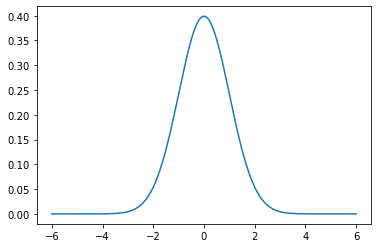

In [17]:
g = Funcoes.gauss(1,0)
#plt.plot(g[0],g[1])
#y = Funcoes.gauss(1,0)
#plt.plot(x,y)

t = interp1d(g[0],g[1])
#f = np.cumsum(g[1])

#plt.plot(g[0],f)
plt.plot(g[0],t(g[0]))

(array([111.,  78.,  79., 114., 127., 161.,  94., 121.,  81.,  34.]),
 array([0.06573074, 0.15849521, 0.25125969, 0.34402416, 0.43678863,
        0.5295531 , 0.62231757, 0.71508204, 0.80784651, 0.90061099,
        0.99337546]),
 <BarContainer object of 10 artists>)

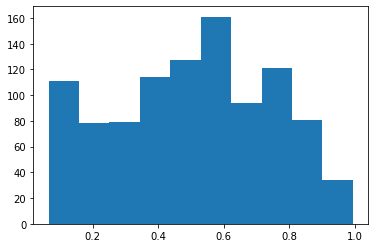

In [31]:
g = Funcoes.gauss(1,0)
t = np.linspace(-5,5,1000)
y = np.cumsum(g[1])
x = np.random.uniform (0,1, 1000)
z = interp1d(y,x)
plt.hist(z(x))

In [3]:
def interpolation(t,y,x):
    coef = []
    
    for i in range(np.size(x)-1):
        j = i + 1   
        aa = (y[i+1]-y[i])/(x[i+1]- x[i])
        bb = y[i] - aa*x[i]
        coef.append([aa,bb])
    print(np.size(coef[0]))
    q = []
    for i in range (np.size(t)):
        for j in range (np.size(x)-1):
            if x[j] < t [i] and  t[i] < x[j+1]:
                qq = (coef[j][0]) * t[i] + (coef[j][1])
                q.append(qq)
    return (q)

In [ ]:
t = np.linspace ((-interv +1), (interv -1), n)
#t = np.arange(n-1)

r = interpolation(t, g[1], g[0])

#r.append(r[-1])
plt.plot(t, r)
#plt.plot(g[0],g[1])
np.size(r)

In [39]:
z = np.linspace ((-interv +1), (interv -1), n)
l=100

def somarmn (z,y,x):
    s = np.size(z)
    v = interpolation(x,y,z)
    deltax = ((z[s-1])-z[0])/s
    b = []
    bb = 0
    for i in range (s): #### retirei o l-1
        bb += y[i]*deltax
        b.append(bb)
    return (b)



In [ ]:
ff = somarmn (z, g[1], g[0])


plt.plot(g[0], ff)
np.size(ff)

In [8]:

def random ():
    ttt = np.linspace(0,1,n)
    t=[]
    for i in range(np.size(ttt)):
        mmm = np.random.choice(ttt)
        t.append(mmm)
    return t



In [ ]:
b = random ()
ii = interpolation (b, g[0], ff)


#ww = np.random.normal(0, 1, n)

#plt.hist(ii)
 #z = random()
plt.hist(b)

In [40]:
class Sample:
    
    def gaussian (𝜎, 𝜇):
        y = Funcoes.gauss(𝜎, 𝜇)
        t = np.linspace ((-interv +1), (interv -1), n)
#        inter = interpolation (t, y[1], y[0])  
        cumulativa = somarmn(t, y[1], y[0])
        unif = random ()
        f = interpolation(unif, y[0], cumulativa)
        return (f)
     
    def uniforme ():
        y = Funcoes.uniform (2)
        t = np.linspace ((-interv +1), (interv -1), n)
        cumulativa = somarmn(t, y[1], y[0])
        unif = random ()
        f = interpolation(unif, y[0], cumulativa)
        return (f)
    
    def exp ():
        y = Funcoes.exp()
        t = np.linspace ((-interv +1), (interv -1), n)
        cumulativa = somarmn(t, y[1], y[0])
        unif = random ()
        f = interpolation(unif, y[0], cumulativa)
        return (f)
    
    def poisson (𝜆):
        y = Funcoes.poisson(𝜆)
        t = np.linspace (0, 29.9, 100)
        cumulativa = somarmn(t, y[1], y[0])
        unif = random ()
        f = interpolation(unif, y[0], cumulativa)
        return (f)

2
2


<ipython-input-3-cee5f7cc3b9a>:6: RuntimeWarning: divide by zero encountered in double_scalars
  aa = (y[i+1]-y[i])/(x[i+1]- x[i])


979

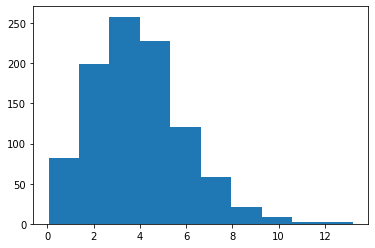

In [44]:
f = Sample.poisson(4)
plt.hist(f)
np.size(f)
#plt.plot(f[0],f[1])
